#Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import all libraries

In [ ]:
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
# Function to resize images using Lanczos resampling
def resize_with_lanczos(image, target_size):
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LANCZOS4)
    return resized_image

#Data collection and Preprocessing

In [ ]:
import cv2
import os
from tqdm import tqdm

# Change to the 'yes' directory
os.chdir('/content/drive/MyDrive/Bra35BT-1200/yes')
X = []
y = []

# Read and resize images for 'yes' category
for i in tqdm(os.listdir()):
    img = cv2.imread(os.path.join('/content/drive/MyDrive/Bra35BT-1200/yes', i))
    img = resize_with_lanczos(img, (299, 299))
    X.append(img)
    y.append('Y')

# Change to the 'no' directory
os.chdir('/content/drive/MyDrive/Bra35BT-1200/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(os.path.join('/content/drive/MyDrive/Bra35BT-1200/no', i))
    img = resize_with_lanczos(img, (299, 299))
    X.append(img)
    y.append('N')

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)
# Normalize pixel values
X = X / 255.0

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

print(len(X))
print(len(y))

100%|██████████| 600/600 [00:04<00:00, 123.69it/s]


1200
1200


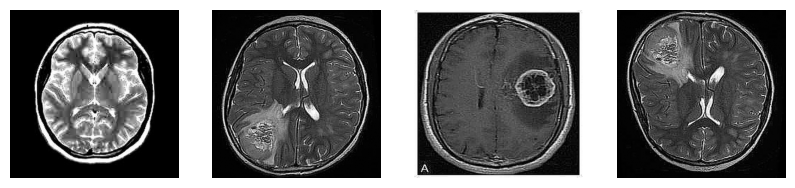

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
# Assuming you have a dataset stored in a numpy array called 'data'
# and corresponding labels stored in a numpy array called 'labels'

# Step 1: Split the data into training and remaining data
X_train, remaining_data, y_train, remaining_labels = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Split the remaining data into validation and testing sets
X_test, val_data, y_test, val_labels = train_test_split(remaining_data, remaining_labels, test_size=0.15, random_state=42)

# Step 3: Verify the sizes of each set
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)


Training data shape: (900, 299, 299, 3)
Training labels shape: (900,)
Testing data shape: (255, 299, 299, 3)
Testing labels shape: (255,)
Validation data shape: (45, 299, 299, 3)
Validation labels shape: (45,)


In [ ]:
print(len(X))
print(len(y))
print(X)
print(y)

1200
1200
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.       

In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
val_labels=le.fit_transform(val_labels)

# Proposed Model Architecture and Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from keras.layers import Flatten
# Load the pre-trained DenseNet201 model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(299,299,3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x= Flatten()(x)
x = Dense(1024, activation='swish')(x)
x= Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model1 = Model(inputs=base_model.input, outputs=predictions)

# Display the model summary
model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model1.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(val_data,val_labels),verbose = 1, initial_epoch=0)
# Evaluate the model
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 305, 305,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 150,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 150, 150,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 150, 150,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 152, 152,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 75, 75,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 75, 75,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 75, 75,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 75,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 75,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 75,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 75,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 75, 75,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 75, 75,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 75, 75,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 75, 75,    │     12,288 │ conv2_block2_0_r

 Total params: 177,576,513 (677.40 MB)

 Trainable params: 159,254,529 (607.51 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.6982 - loss: 25.7299 - val_accuracy: 0.8222 - val_loss: 6.4941
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - accuracy: 0.9272 - loss: 2.2722 - val_accuracy: 0.9778 - val_loss: 0.0179
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accuracy: 0.9803 - loss: 0.4476 - val_accuracy: 1.0000 - val_loss: 4.4272e-08
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.9945 - loss: 0.0547 - val_accuracy: 1.0000 - val_loss: 8.5830e-11
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.9930 - loss: 0.0516 - val_accuracy: 1.0000 - val_loss: 9.1674e-07
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9980 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 4.2674e-04
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.9974 - loss: 0.0303 - val_accuracy: 1.0000 - val_loss: 2.8669e-15
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.9993 - loss:

#Model Evaluation

8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step
Test Accuracy = 1.00


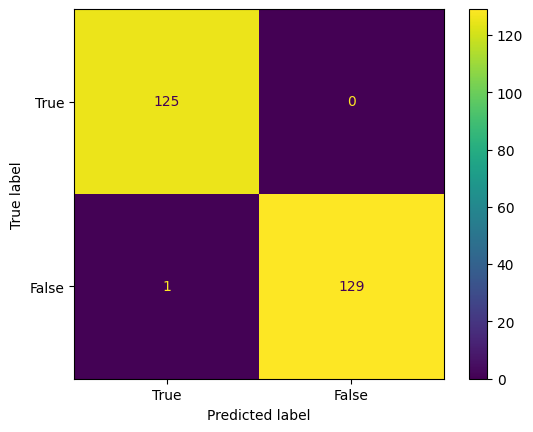

AUC Score: 0.9961538461538462
Precision: 1.0
Recall: 0.9923076923076923
F1 Score: 0.9961389961389961


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
predictions = model1.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]
accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)
confusion_mtx = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=[True,False])
cm_display.plot()
plt.show()
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
# Compute the AUC score
auc = roc_auc_score(y_test, predictions)  # Assuming you want to compute the AUC for class 1
print("AUC Score:", auc)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

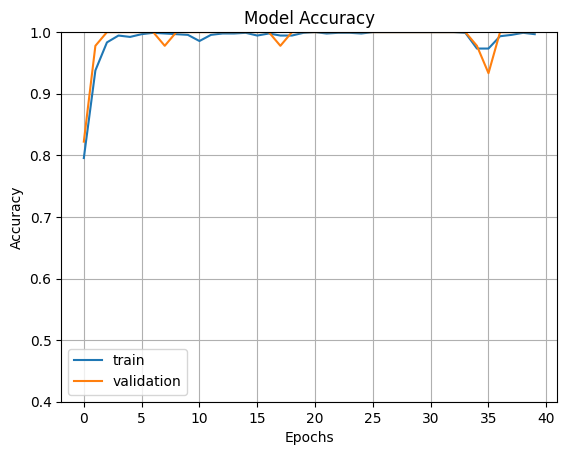

In [ ]:
#Evaluating The Model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

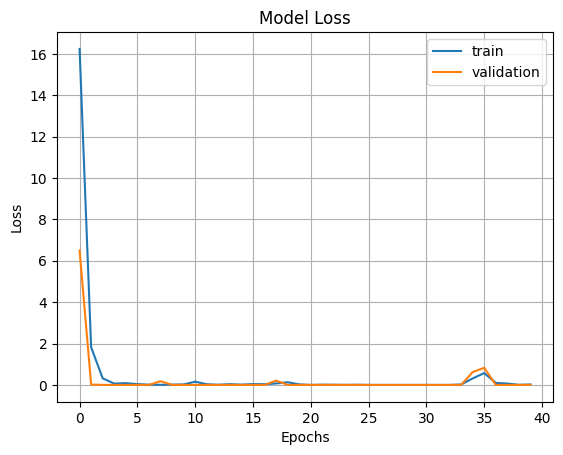

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, predictions)
print("Jaccard Index:", jaccard)
tn, fp, fn, tp = confusion_mtx.ravel()
specificity = tn / (tn + fp)
print("Specificity (True Negative Rate):", specificity)
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)
fnr = fn / (fn + tp)
print("False Negative Rate:", fnr)
npv = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv)
from sklearn.metrics import fbeta_score

# Compute the F2 Score
f2 = fbeta_score(y_test, predictions, beta=2)
print("F2 Score:", f2)

from sklearn.metrics import hamming_loss
hamming_loss_value = hamming_loss(y_test, predictions)
print("Hamming Loss:", hamming_loss_value)
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, predictions)
print("Jaccard Index:", jaccard)

Jaccard Index: 0.9923076923076923
Specificity (True Negative Rate): 1.0
False Positive Rate: 0.0
False Negative Rate: 0.007692307692307693
Negative Predictive Value (NPV): 0.9920634920634921
F2 Score: 0.9938366718027735
Hamming Loss: 0.00392156862745098
Jaccard Index: 0.9923076923076923


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test contains true labels and predictions contains predicted labels
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       130

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255

